In [91]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings('ignore')

In [2]:
airlineData = pd.read_excel('Airlines+Data.xlsx')

In [5]:
airlineData.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [6]:
type(airlineData.Month)

pandas.core.series.Series

In [7]:
airlineData.Month = pd.to_datetime(airlineData.Month)

In [10]:
airlineData.set_index('Month',inplace= True)

In [11]:
airlineData.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [16]:
airlineData.tail()

,Passengers
Month,
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


In [12]:
airlineData.shape

(96, 1)

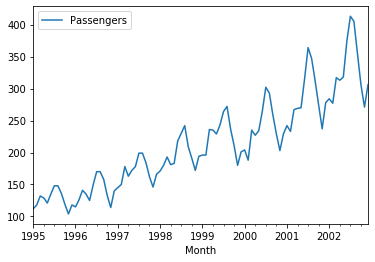

In [15]:
airlineData.plot()
plt.show()

In [47]:
def Plotting(data):
    
    rollingMean = data.rolling(12).mean()
    rollingStd = data.rolling(12).std()
    
    # plotting trend Data
    plt.figure(figsize=(19,9))
    plt.plot(data,color='blue',label='Data')
    plt.plot(rollingMean,color='red',label='Mean')
    plt.plot(rollingStd,color='green',label='STD')
    plt.title('Trend Analysis')
    plt.legend(loc='best')
    plt.show()
    
    NonRollingMeanData = data-rollingMean
    
    NonRollingMeanDataRollingMean = NonRollingMeanData.rolling(12).mean()
    NonRollingMeanDataRollingStd = NonRollingMeanData.rolling(12).std()
    #Plotting Stationarity
    plt.figure(figsize=(19,9))
    plt.plot(NonRollingMeanData,color='blue',label='Data')
    plt.plot(NonRollingMeanDataRollingMean,color='Red',label='Mean')
    plt.plot(NonRollingMeanDataRollingStd,color='green',label='STD')
    plt.title('NonRollingMeanData (Statinary Analysis)')
    plt.legend(loc='best')
    plt.show()
    

In [56]:
def StationaryCriticalValueCheck(data,window=12):
    
    rollingMean = data.rolling(12).mean()
    rollingStd = data.rolling(12).std()
    
    NonRollingMeanData = data-rollingMean
    
    NonRollingMeanData = NonRollingMeanData.dropna()
    NonRollingMeanDataRollingMean = NonRollingMeanData.rolling(12).mean()
    NonRollingMeanDataRollingStd = NonRollingMeanData.rolling(12).std()
    
    
    #Plotting Stationarity
    plt.figure(figsize=(19,9))
    plt.plot(NonRollingMeanData,color='blue',label='Data')
    plt.plot(NonRollingMeanDataRollingMean,color='Red',label='Mean')
    plt.plot(NonRollingMeanDataRollingStd,color='green',label='STD')
    plt.title('NonRollingMeanData (Statinary Analysis)')
    plt.legend(loc='best')
    plt.show()
    
    
    fuller = adfuller(data,autolag='AIC')
    print()
    print()
    print('Statistics Value',fuller[0])
    print('P Value',fuller[1])
    print('No. of Lags',fuller[2])
    print('No. of Observation Used',fuller[3])
    
    for key,values in fuller[4].items():
        print(key,"\t",values)
    
    

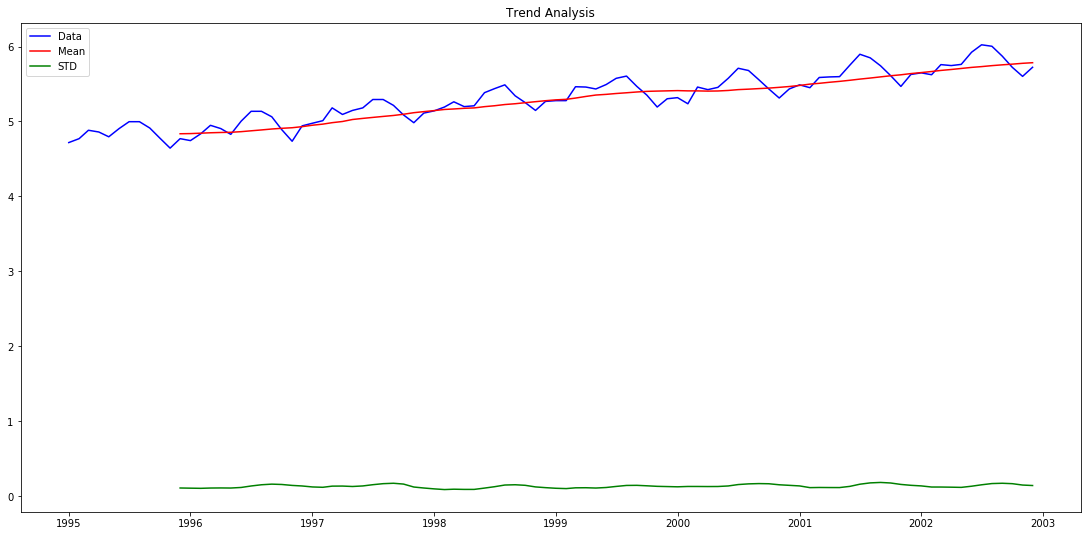

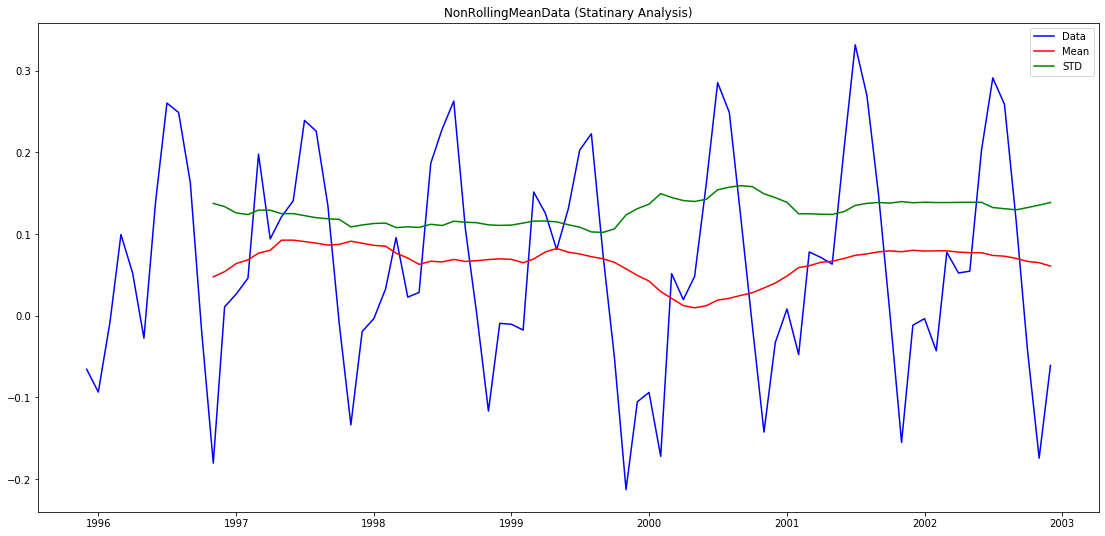

In [57]:
logData = np.log(airlineData)

Plotting(logData)

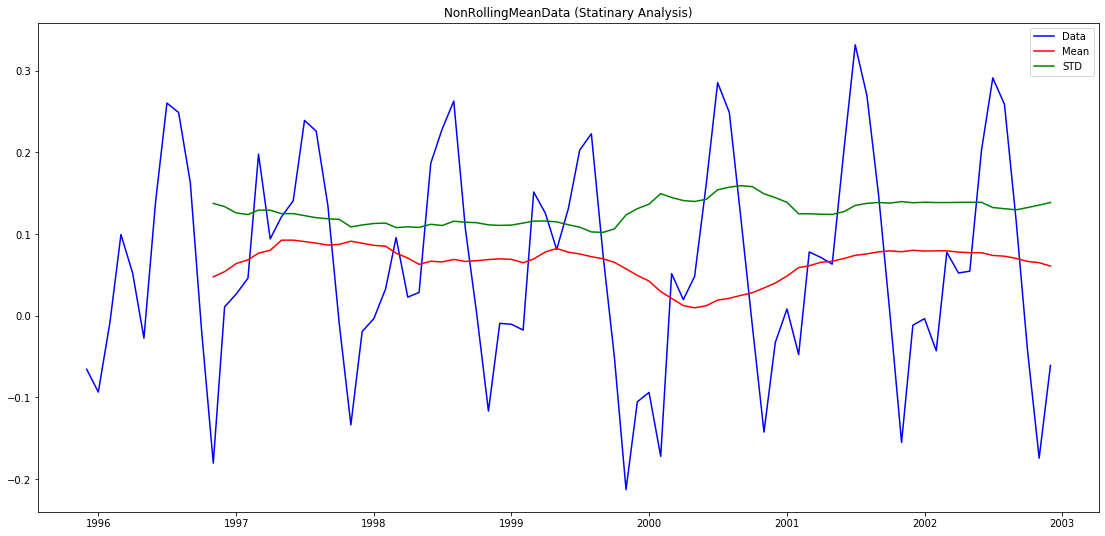



Statistics Value -0.7230267542465458
P Value 0.8406945968114727
No. of Lags 12
No. of Observation Used 83
1% 	 -3.5117123057187376
5% 	 -2.8970475206326833
10% 	 -2.5857126912469153


In [58]:
StationaryCriticalValueCheck(logData)

In [59]:
# taking the Exponent Weighted Moving Average

In [61]:
ewma = logData.ewm(12).mean()
expLogData = logData-ewma

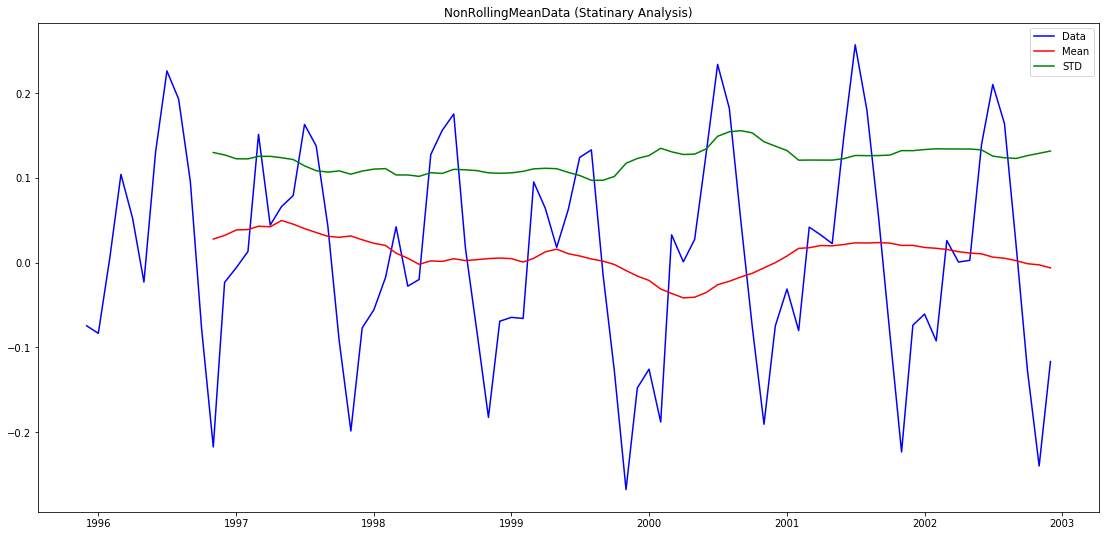



Statistics Value -2.9145674282573495
P Value 0.04368003932089577
No. of Lags 12
No. of Observation Used 83
1% 	 -3.5117123057187376
5% 	 -2.8970475206326833
10% 	 -2.5857126912469153


In [62]:
StationaryCriticalValueCheck(expLogData)

In [63]:
shiftData = logData.shift(1)

In [64]:
I = logData - shiftData

In [67]:
I = I.dropna()

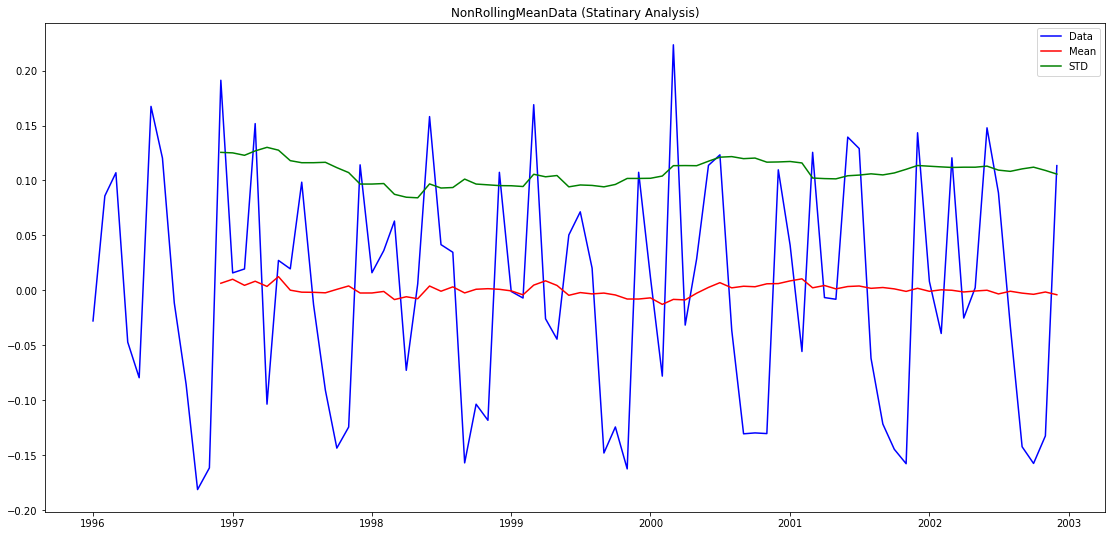



Statistics Value -2.67082289026949
P Value 0.07922469056628867
No. of Lags 12
No. of Observation Used 82
1% 	 -3.512738056978279
5% 	 -2.8974898650628984
10% 	 -2.585948732897085


In [68]:
StationaryCriticalValueCheck(I)

In [70]:
decompose = seasonal_decompose(logData)

In [72]:
seasonality = decompose.seasonal
trend = decompose.trend
residual = decompose.resid

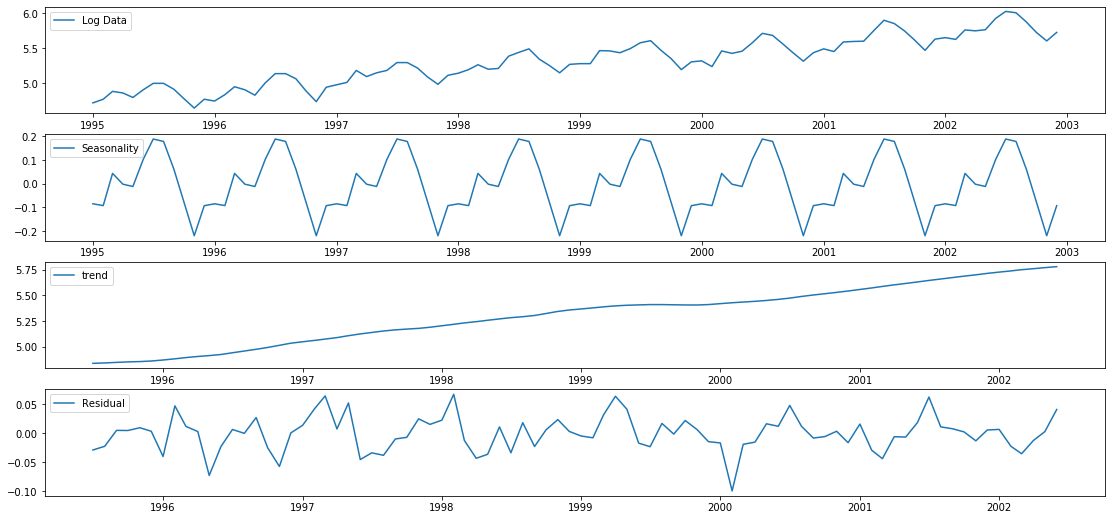

In [77]:
plt.figure(figsize=(19,9))

plt.subplot(411)
plt.plot(logData,label='Log Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(seasonality,label='Seasonality')
plt.legend(loc='best')


plt.subplot(413)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.show()

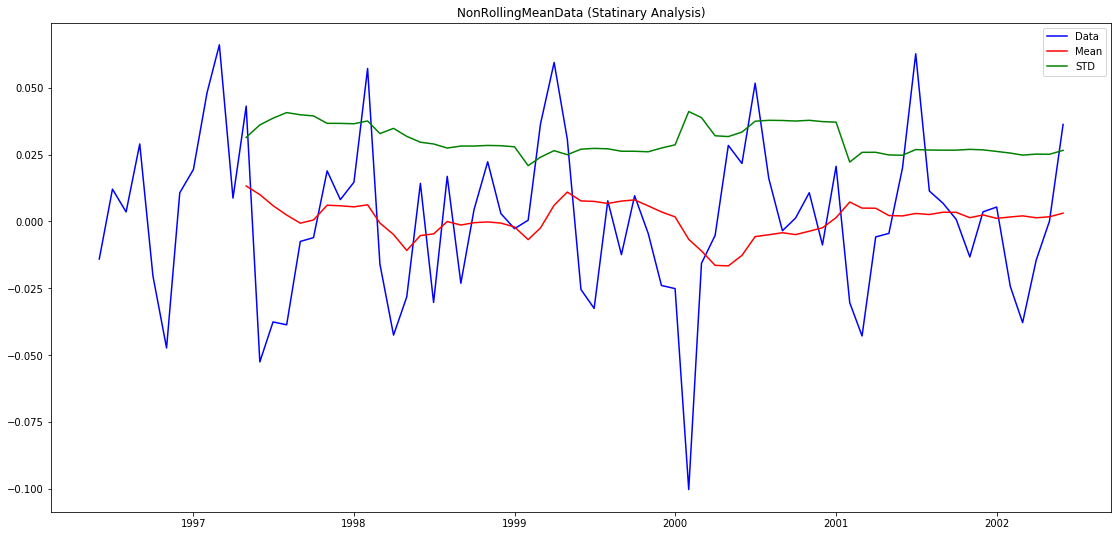



Statistics Value -5.90786307433507
P Value 2.6819697423917004e-07
No. of Lags 3
No. of Observation Used 80
1% 	 -3.5148692050781247
5% 	 -2.8984085156250003
10% 	 -2.58643890625


In [79]:
residual = residual.dropna()

StationaryCriticalValueCheck(residual)

In [85]:
acfData = acf(logData,20)
pacfData = pacf(logData,20,"OLS")

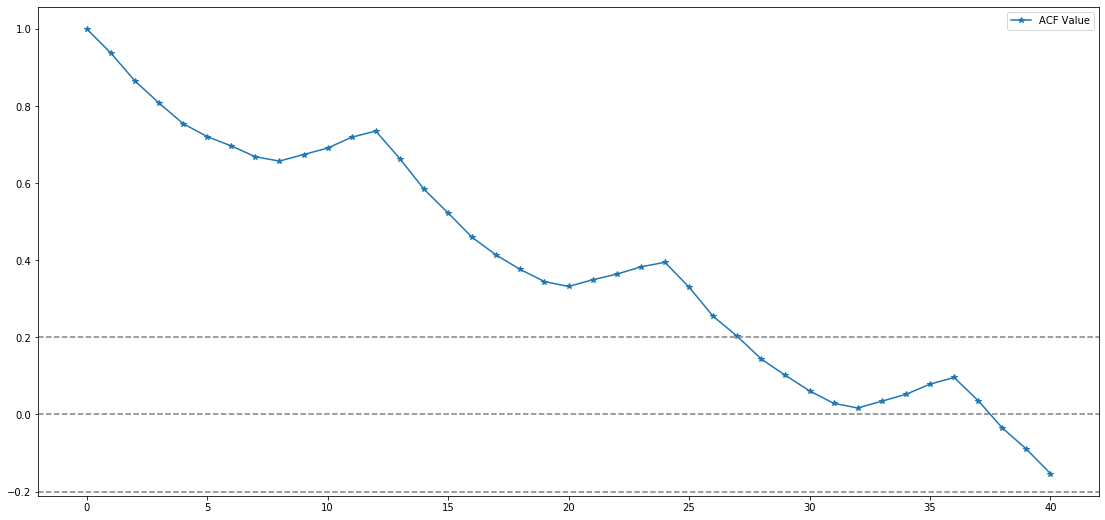

In [86]:
plt.figure(figsize=(19,9))

plt.plot(acfData,label='ACF Value',marker='*')

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(I)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(I)),linestyle='--',color='gray')

#plt.xticks(ticks=[0,1,2,3])

plt.legend(loc='best')
plt.show()

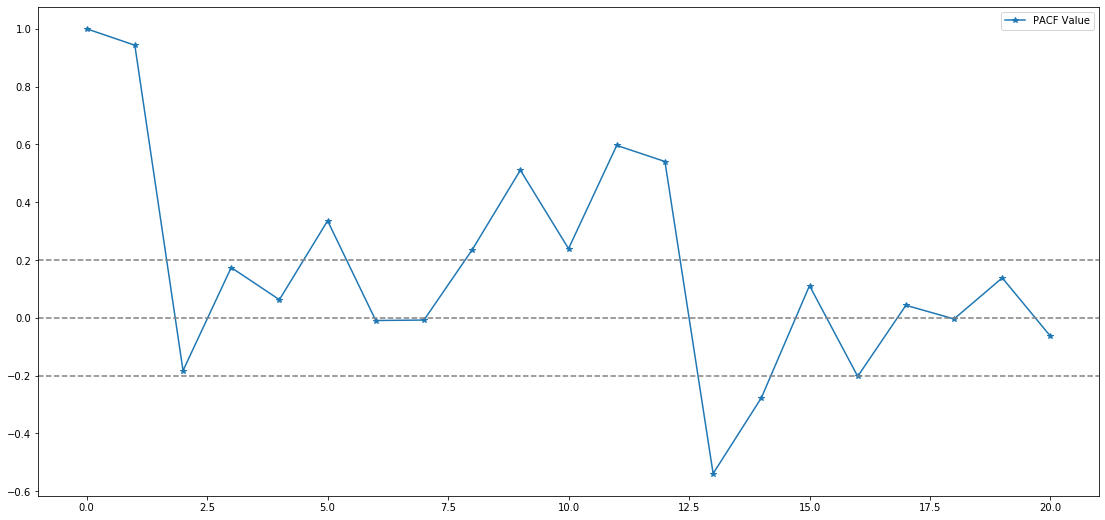

In [88]:
plt.figure(figsize=(19,9))

plt.plot(pacfData,label='PACF Value',marker='*')

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(I)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(I)),linestyle='--',color='gray')

#plt.xticks(ticks=[0,1,2,3])

plt.legend(loc='best')
plt.show()

In [227]:
# ARIMA Model

arima = ARIMA(logData,order = (9,1,4))
fitted_arima = arima.fit(disp=-1)

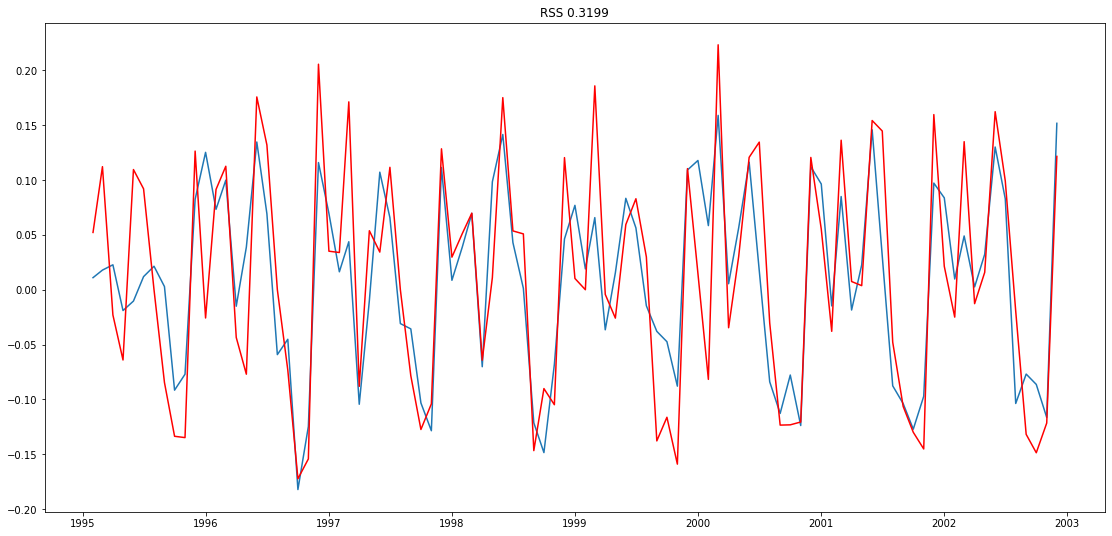

In [228]:
plt.figure(figsize=(19,9))

plt.plot(fitted_arima.fittedvalues)
plt.plot(I,color='Red')

plt.title('RSS %.4f'%sum((fitted_arima.fittedvalues-I['Passengers'])**2))

plt.show()

In [229]:
fitted_arima_series = pd.Series(fitted_arima.fittedvalues,copy=True)

fitted_arima_series.head()

Month
1995-02-01    0.010989
1995-03-01    0.017872
1995-04-01    0.022704
1995-05-01   -0.018984
1995-06-01   -0.010337
dtype: float64

In [230]:
fitted_arima_series = fitted_arima_series.cumsum()

fitted_arima_series.head()

Month
1995-02-01    0.010989
1995-03-01    0.028861
1995-04-01    0.051564
1995-05-01    0.032580
1995-06-01    0.022244
dtype: float64

In [231]:
ArimaSeries = pd.Series(logData.iloc[0:,0:].values.flatten(),index = logData.index)

ArimaSeries = ArimaSeries.add(fitted_arima_series,fill_value=0)

In [232]:
ArimaSeries.head()

Month
1995-01-01    4.718499
1995-02-01    4.781673
1995-03-01    4.911662
1995-04-01    4.911377
1995-05-01    4.828371
dtype: float64

In [233]:
ArimaSeries = np.exp(ArimaSeries)

ArimaSeries.head()

Month
1995-01-01    112.000000
1995-02-01    119.303819
1995-03-01    135.865102
1995-04-01    135.826264
1995-05-01    125.007159
dtype: float64

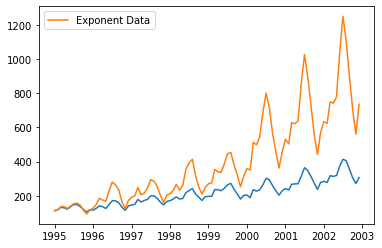

In [234]:
plt.plot(airlineData)
plt.plot(ArimaSeries,label='Exponent Data')
plt.legend()

plt.show()

Text(0.5, 1.0, 'RMSE: 263.5545')

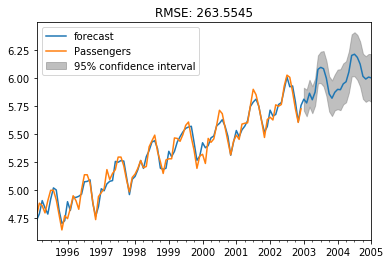

In [238]:
fitted_arima.plot_predict(1,120)


plt.title('RMSE: %.4f'% np.sqrt(sum((ArimaSeries - airlineData['Passengers'])**2)/len(airlineData)))

In [237]:
96+24

120